# DL Study third week
### MNIST dataset으로 CNN 모델 학습하기

In [1]:
# 필요 라이브러리 및 모듈 로드
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# mnist dataset 로드
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# dataset의 차원 확인하기
print('The dimension of train data :', X_train.shape, y_train.shape)
print('The dimension of test data :', X_test.shape, y_test.shape)

In [ ]:
# label data를 one-hot encoding으로 변환 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# normalization
X_train = X_train/255.0
X_test = X_test/255.0

# CNN model 구축  
- CNN을 다루기 위해 필요한 용어 파악하기!  
    - 1. convolution  
    - 2. channel  
    - 3. filter or kernel  
    - 4. stride  
    - 5. padding  
    - 6. pooling
    
- 1. convolution  
    - 합성곱 연산을 의미 (행렬곱이 아님을 주의!)
    
<img src = "http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif">

- 2. channel  
    - 컬러 사진은 RGB 3 channel로 이루어짐  

<img src = "https://taewanmerepo.github.io/2018/01/cnn/channel.jpg" width=500>  

- 3. filter or kernel  
    - 이미지의 특징을 찾아내는 역할  
    - 일반적으로 (3,3) 정사각형 행렬로 정의됨  
    - CNN에서 학습의 대상!  
    - filter는 지정된 간격(stride)으로 이동하면서 이미지와 합성곱하면서 feature map 생성  
<img src = "https://taewanmerepo.github.io/2018/01/cnn/conv.png">  

- 4. stride  
    - filter를 얼만큼 순회할지 결정하는 파라미터  
    - stride=1로 설정하면 1칸씩 이동하면서 합성곱을 수행하게 됨  
<img src = "https://taewanmerepo.github.io/2018/01/cnn/filter.jpg">

- 5. padding  
    - convolution layer에서 filter와 stride로 인해 featrue map의 크기는 input image 보다 크기가 작음  
    - convolution layer에서 output의 크기가 줄어드는 것을 방지하는 것이 padding  
    - padding은 input data의 외곽에 지정된 픽셀만큼 특정 값으로 채움을 의미  
    - 보통 0으로 채움  
<img src = "https://taewanmerepo.github.io/2018/01/cnn/padding.png">

- 6. pooling  
    - pooling layer는 convolution layer의 output을 입력으로 받아 크기를 줄여주는 역할  
    - 또는 특정 feature를 강조하는 용도로 사용됨!  
    - pooling layer로는 max pooling, average pooling 등이 존재  
<img src = "https://taewanmerepo.github.io/2018/02/cnn/maxpulling.png">  

In [ ]:
# 모델 구축하기 전에 이미지 shape 변경
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [2]:
# CNN 구축
model = tf.keras.models.Sequential([
    ################# first convolution layer #################
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), strides=1, padding='same', activation='relu',
                           input_shape=(28,28,1)),
    ################# first pooling layer #################
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    ################# second convolution layer #################
    tf.keras.layers.Conv2D(20, kernel_size=(3,3), strides=1, padding='same', activation='relu'),
    ################# second pooling layer #################
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    ################# fully connected layer #################
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    #########################################################
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 20)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 980)               0         
                                                                 
 dense (Dense)               (None, 100)               9

In [26]:
# 학습하기 전 모델 compile하기
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5867 - acc: 0.8185
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1751 - acc: 0.9465
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1219 - acc: 0.9625
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0947 - acc: 0.9708
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0802 - acc: 0.9749
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0691 - acc: 0.9790
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0612 - acc: 0.9809
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0565 - acc: 0.9820
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0510 - acc: 0.9841
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0469 - acc: 0.9853


In [ ]:
# loss 및 accuracy 그래프 살펴보기
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend(loc='best')
plt.show()
# loss는 0에 가까울수록, 수렴할수록 잘 훈련되었다는 증거!
# accuracy의 경우 1에 가까울수록 잘 훈련되었다는 증거!

In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Error: {test_loss}, Accuracy: {test_acc*100:.2f}%')

In [ ]:
# test data에 대해 model prediction 진행
prediction = model.predict(X_test)

In [ ]:
# one-hot encoding label -> integer label
prediction_label = np.argmax(prediction, axis=1)
test_label = np.argmax(y_test, axis=1)

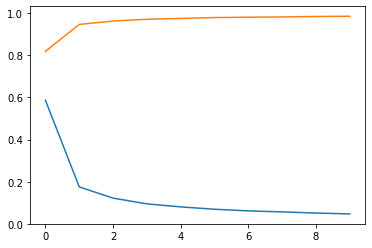

In [31]:
# prediction_label과 test_label이 같지 않은 인덱스들 뽑기
false_index = np.where(prediction_label!=test_label)[0]

In [ ]:
# 잘못 분류된 이미지와 라벨과 score 살펴보기
plt.figure(figsize=(20,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[false_index[i]], cmap='gray')
    plt.title(f'score: {prediction[false_index[i]][prediction_label[false_index[i]]]:.2f}'
              f'\nlabel: {test_label[false_index[i]]},'
              f' predicted: {prediction_label[false_index[i]]}\n',
              fontsize=15)
plt.show()

# Homework  
- 본인이 하고 싶은 dataset으로 CNN model 학습시키기  